In [1]:
import pandas as pd

# Função para conversão personalizada
def converter_valor(valor):
    if valor == '-':
        return 0
    else:
        return float(valor)
    
# Lendo o arquivo CSV
df = pd.read_csv('esgoto.csv', sep=';', header=None)

# Definindo o nome das colunas
colunas = ['municipio', 'esgoto1', 'esgoto2', 'esgoto3']


# Aplicando os nomes e tipos das colunas
df.columns = colunas

# Convertendo os valores das colunas
df['esgoto1'] = df['esgoto1'].apply(converter_valor)
df['esgoto2'] = df['esgoto2'].apply(converter_valor)
df['esgoto3'] = df['esgoto3'].apply(converter_valor)

# Criando a coluna 'total'
df['esgoto'] = df['esgoto1'] + df['esgoto2'] + df['esgoto3']

# Exibindo o DataFrame resultante
print(df)

# Criando o DataFrame df2 com as colunas municipio e total
df2 = df.loc[:, ['municipio', 'esgoto']]

# Exibindo o DataFrame df2
print(df2)

                municipio  esgoto1  esgoto2  esgoto3  esgoto
0     Rio de Janeiro (RJ)   1874.0   6428.0     27.0  8329.0
1       Juiz de Fora (MG)   1360.0      0.0      0.0  1360.0
2      Caxias do Sul (RS)   1270.0    453.0      0.0  1723.0
3          Bebedouro (SP)    716.0      0.0      0.0   716.0
4           Barretos (SP)    600.0      0.0      0.0   600.0
...                   ...      ...      ...      ...     ...
5565      Vianópolis (GO)      0.0      0.0      0.0     0.0
5566  Vicentinópolis (GO)      0.0      0.0      0.0     0.0
5567        Vila Boa (GO)      0.0      0.0      0.0     0.0
5568   Vila Propício (GO)      0.0      0.0      0.0     0.0
5569        Brasília (DF)      0.0   6972.0    740.0  7712.0

[5570 rows x 5 columns]
                municipio  esgoto
0     Rio de Janeiro (RJ)  8329.0
1       Juiz de Fora (MG)  1360.0
2      Caxias do Sul (RS)  1723.0
3          Bebedouro (SP)   716.0
4           Barretos (SP)   600.0
...                   ...     ...
5565 

In [2]:
import pandas as pd
import re

# Ler os arquivos CSV e nomear as colunas
df1 = pd.read_csv('t1.csv', names=['municipio', 'populacao'], sep=';')
df3 = pd.read_csv('t3.csv', names=['municipio', 'agua'], sep=';')

# Remover caracteres não numéricos e converter as colunas para valores numéricos
df1['populacao'] = pd.to_numeric(df1['populacao'].str.replace(r'\D', '', regex=True), errors='coerce')
df3['agua'] = pd.to_numeric(df3['agua'].str.replace(r'\D', '', regex=True), errors='coerce')

# Mesclar os DataFrames usando a coluna em comum
df_merged = pd.merge(df1, df2, on='municipio')
df_merged = pd.merge(df_merged, df3, on='municipio')

# Verificar e remover duplicatas
df_merged.drop_duplicates(subset='municipio', keep='first', inplace=True)

# Substituir valores em branco (NaN) por zero
df_merged.fillna(0, inplace=True)

# Criar o indicador agua/pop
df_merged['agua/pop'] = df_merged['agua'] / df_merged['populacao']

# Criar o indicador agua/pop
df_merged['esgoto/pop'] = df_merged['esgoto'] / df_merged['populacao']


# Salvar o DataFrame resultante em um arquivo Excel
df_merged.to_excel('resultadoBrasil.xlsx', index=False)

print(df_merged)


                       municipio  populacao  esgoto    agua  agua/pop  \
0     Alta Floresta D'Oeste (RO)    25437.0     0.0    53.0  0.002084   
1                 Ariquemes (RO)   107345.0     9.0   165.0  0.001537   
2                    Cabixi (RO)     6224.0     0.0    33.0  0.005302   
3                    Cacoal (RO)    88507.0   280.0   512.0  0.005785   
4                Cerejeiras (RO)    17934.0     0.0   106.0  0.005911   
...                          ...        ...     ...     ...       ...   
5512             Vianópolis (GO)    13675.0     0.0    81.0  0.005923   
5513         Vicentinópolis (GO)     8397.0     0.0    30.0  0.003573   
5514               Vila Boa (GO)     5731.0     0.0    20.0  0.003490   
5515          Vila Propício (GO)     5690.0     0.0    24.0  0.004218   
5516               Brasília (DF)  3039444.0  7712.0  8855.0  0.002913   

      esgoto/pop  
0       0.000000  
1       0.000084  
2       0.000000  
3       0.003164  
4       0.000000  
...      

In [3]:
# Ordenar o DataFrame pela coluna do indicador agua/pop em ordem decrescente
df_merged.sort_values('agua/pop',ascending=False, inplace=True)

#print(df_merged)

In [4]:
# Ordenar o DataFrame pela coluna do indicador agua/pop em ordem decrescente
df_merged.sort_values('esgoto/pop',ascending=False, inplace=True)

#print(df_merged)

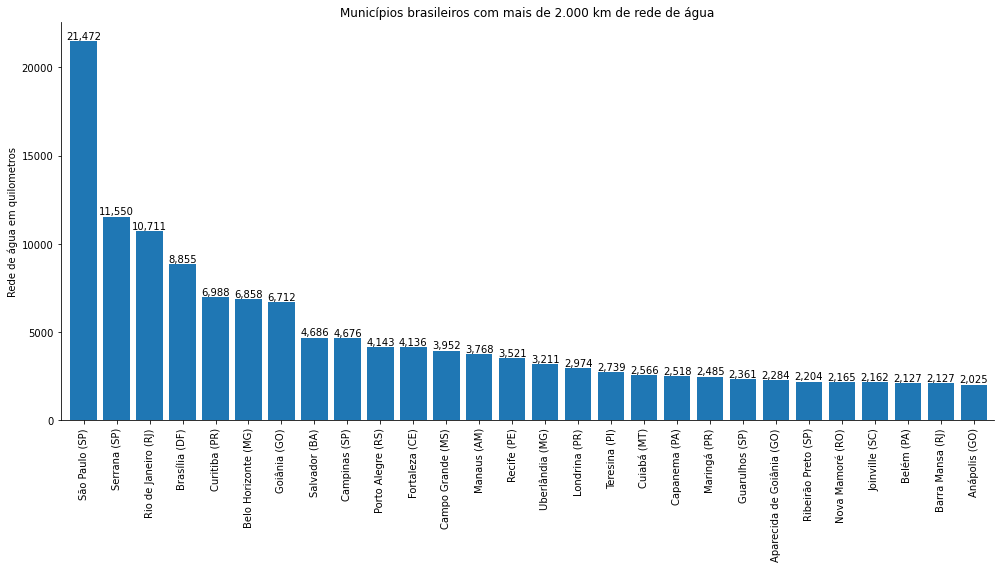

In [60]:
import matplotlib.pyplot as plt

# Filtrar os valores do DataFrame com indicador maior que 2000 km
df_filtered = df_merged[df_merged['agua'] > 2000].copy()

# Ordenar o DataFrame pelo indicador agua em ordem decrescente
df_filtered.sort_values('agua', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(df_filtered['municipio'], df_filtered['agua'])
plt.xticks(rotation=90)
#plt.xlabel('Municípios')
plt.ylabel('Rede de água em quilometros')
plt.title('Municípios brasileiros com mais de 2.000 km de rede de água')
plt.tight_layout()

# Adicionar os valores das colunas acima de cada barra
for i, v in enumerate(df_filtered['agua']):
    plt.text(i, v, "{:,.0f}".format(v, thousands="."), ha='center', va='bottom')

    # Reduzir espaços entre a origem dos eixos e as barras
plt.xlim(-0.7, len(df_filtered['municipio']) - 0.4)

# Remover borda superior e borda lateral direita
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')


plt.savefig('agua_brasil.png')

plt.show()

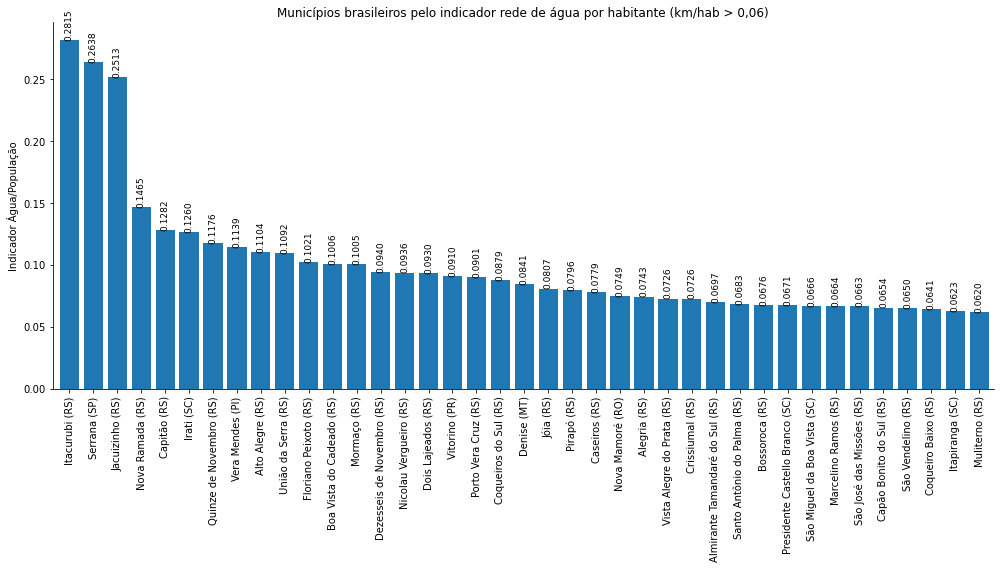

In [39]:
import matplotlib.pyplot as plt

# Filtrar os valores do DataFrame com indicador maior que 0.03
df_filtered = df_merged[df_merged['agua/pop'] > 0.06].copy()

# Ordenar o DataFrame pelo indicador agua/pop em ordem decrescente
df_filtered.sort_values('agua/pop', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(df_filtered['municipio'], df_filtered['agua/pop'])
plt.xticks(rotation=90)
#plt.xlabel('Municípios')
plt.ylabel('Indicador Água/População')
plt.title('Municípios brasileiros pelo indicador rede de água por habitante (km/hab > 0,06)')
plt.tight_layout()

# Adicionar os valores das colunas acima de cada barra
for i, v in enumerate(df_filtered['agua/pop']):
    plt.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=9, rotation=90)
    
# Reduzir espaços entre a origem dos eixos e as barras
plt.xlim(-0.7, len(df_filtered['municipio']) - 0.4)

# Remover borda superior e borda lateral direita
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.savefig('indicadorAgua_brasil.png')

plt.show()

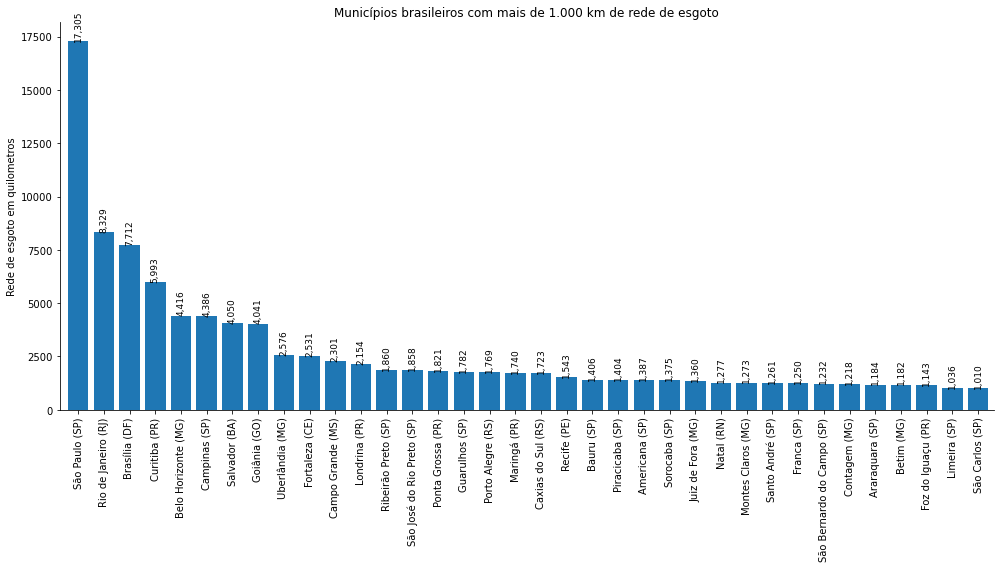

In [43]:
import matplotlib.pyplot as plt

# Filtrar os valores do DataFrame com indicador maior que 2000 km
df_filtered = df_merged[df_merged['esgoto'] > 1000].copy()

# Ordenar o DataFrame pelo indicador agua em ordem decrescente
df_filtered.sort_values('esgoto', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(df_filtered['municipio'], df_filtered['esgoto'])
plt.xticks(rotation=90)
#plt.xlabel('Municípios')
plt.ylabel('Rede de esgoto em quilometros')
plt.title('Municípios brasileiros com mais de 1.000 km de rede de esgoto')
plt.tight_layout()

# Adicionar os valores das colunas acima de cada barra
for i, v in enumerate(df_filtered['esgoto']):
    plt.text(i, v, "{:,.0f}".format(v), ha='center', va='bottom', fontsize=9, rotation=90)
    
# Reduzir espaços entre a origem dos eixos e as barras
plt.xlim(-0.7, len(df_filtered['municipio']) - 0.4)

# Remover borda superior e borda lateral direita
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.savefig('esgoto_brasil.png')

plt.show()

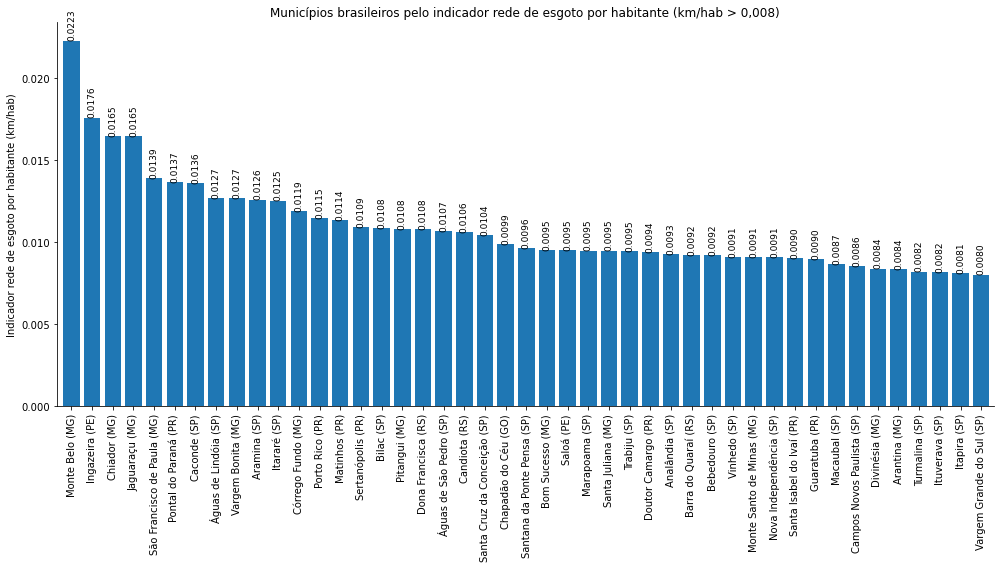

In [59]:
import matplotlib.pyplot as plt

# Filtrar os valores do DataFrame com indicador maior que 0.008
df_filtered = df_merged[df_merged['esgoto/pop'] > 0.008].copy()

# Ordenar o DataFrame pelo indicador agua/pop em ordem decrescente
df_filtered.sort_values('esgoto/pop', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(df_filtered['municipio'], df_filtered['esgoto/pop'])
plt.xticks(rotation=90)
#plt.xlabel('Municípios')
plt.ylabel('Indicador rede de esgoto por habitante (km/hab)')
plt.title('Municípios brasileiros pelo indicador rede de esgoto por habitante (km/hab > 0,008)')
plt.tight_layout()

# Adicionar os valores das colunas acima de cada barra
for i, v in enumerate(df_filtered['esgoto/pop']):
    plt.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=9, rotation=90)
    
# Reduzir espaços entre a origem dos eixos e as barras
plt.xlim(-0.7, len(df_filtered['municipio']) - 0.4)

# Remover borda superior e borda lateral direita
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.savefig('indicadorEsgoto_brasil.png')

plt.show()

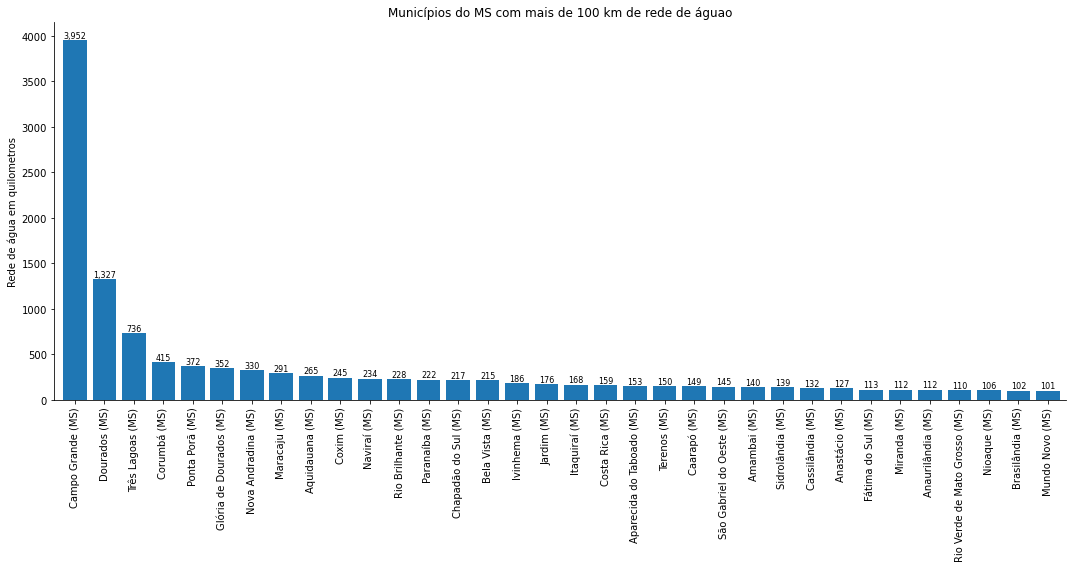

In [61]:
import matplotlib.pyplot as plt

# Filtrar apenas os municípios do Mato Grosso do Sul
df_ms = df_merged[df_merged['municipio'].str.endswith('(MS)')]


# Salvar o DataFrame resultante em um arquivo Excel
#df_ms.to_excel('resultadoAguaMS.xlsx', index=False)

# Filtrar os valores do DataFrame com indicador maior que 2000 km
df_filtered = df_ms[df_ms['agua'] > 100].copy()

# Ordenar o DataFrame pelo indicador agua em ordem decrescente
df_filtered.sort_values('agua', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(df_filtered['municipio'], df_filtered['agua'])
plt.xticks(rotation=90)
#plt.xlabel('Municípios')
plt.ylabel('Rede de água em quilometros')
plt.title('Municípios do MS com mais de 100 km de rede de águao')
plt.tight_layout()

# Adicionar os valores das colunas acima de cada barra
for i, v in enumerate(df_filtered['agua']):
    plt.text(i, v, "{:,.0f}".format(v), ha='center', va='bottom', fontsize=8)
    
# Reduzir espaços entre a origem dos eixos e as barras
plt.xlim(-0.7, len(df_filtered['municipio']) - 0.4)

# Remover borda superior e borda lateral direita
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')


plt.savefig('aguao_MS.png')

plt.show()

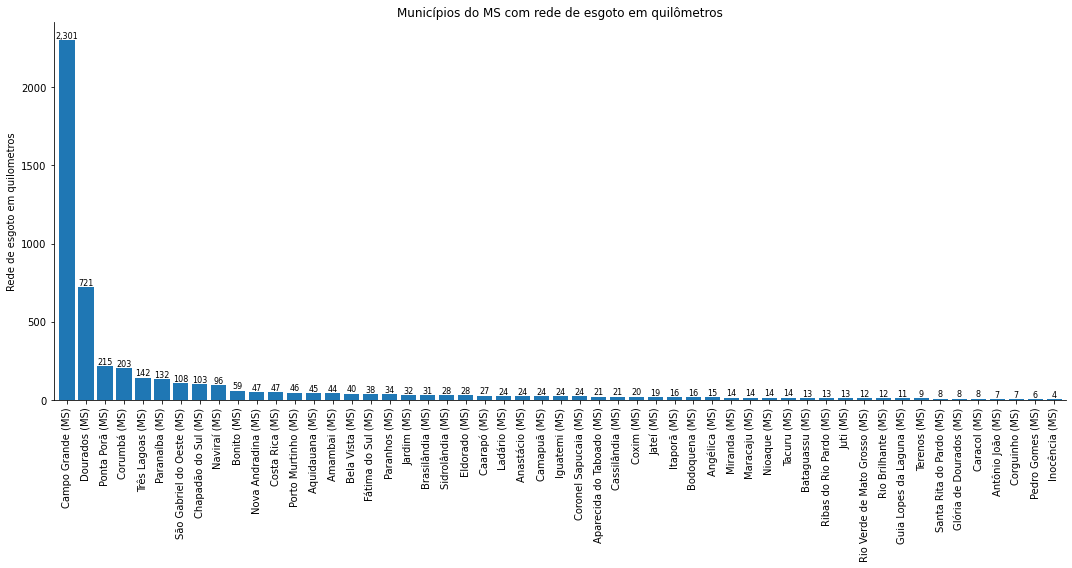

In [62]:
import matplotlib.pyplot as plt

# Filtrar apenas os municípios do Mato Grosso do Sul
df_ms = df_merged[df_merged['municipio'].str.endswith('(MS)')]


# Salvar o DataFrame resultante em um arquivo Excel
# df_ms.to_excel('resultadoAguaMS.xlsx', index=False)

# Filtrar os valores do DataFrame com indicador maior que 2000 km
df_filtered = df_ms[df_ms['esgoto'] > 0].copy()

# Ordenar o DataFrame pelo indicador agua em ordem decrescente
df_filtered.sort_values('esgoto', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(df_filtered['municipio'], df_filtered['esgoto'])
plt.xticks(rotation=90)
#plt.xlabel('Municípios')
plt.ylabel('Rede de esgoto em quilometros')
plt.title('Municípios do MS com rede de esgoto em quilômetros')
plt.tight_layout()

# Adicionar os valores das colunas acima de cada barra
for i, v in enumerate(df_filtered['esgoto']):
    plt.text(i, v, "{:,.0f}".format(v), ha='center', va='bottom', fontsize=8)
    
# Reduzir espaços entre a origem dos eixos e as barras
plt.xlim(-0.7, len(df_filtered['municipio']) - 0.4)

# Remover borda superior e borda lateral direita
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')


plt.savefig('esgoto_MS.png')

plt.show()

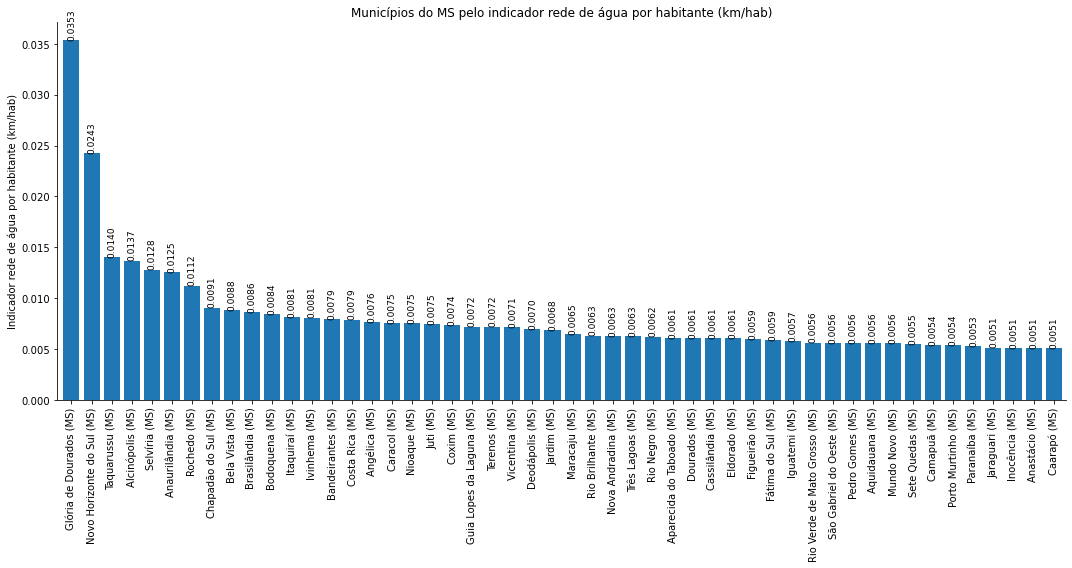

In [37]:
import matplotlib.pyplot as plt

# Filtrar apenas os municípios do Mato Grosso do Sul
df_ms = df_merged[df_merged['municipio'].str.endswith('(MS)')]


# Salvar o DataFrame resultante em um arquivo Excel
#df_ms.to_excel('indicadorAguaMS.xlsx', index=False)

# Filtrar os valores do DataFrame com indicador maior que 2000 km
df_filtered = df_ms[df_ms['agua/pop'] > 0.005].copy()

# Ordenar o DataFrame pelo indicador agua em ordem decrescente
df_filtered.sort_values('agua/pop', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(df_filtered['municipio'], df_filtered['agua/pop'])
plt.xticks(rotation=90)
#plt.xlabel('Municípios')
plt.ylabel('Indicador rede de água por habitante (km/hab)')
plt.title('Municípios do MS pelo indicador rede de água por habitante (km/hab)')
plt.tight_layout()

# Adicionar os valores das colunas acima de cada barra
for i, v in enumerate(df_filtered['agua/pop']):
    plt.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=9, rotation=90)
    
# Reduzir espaços entre a origem dos eixos e as barras
plt.xlim(-0.7, len(df_filtered['municipio']) - 0.4)

# Remover borda superior e borda lateral direita
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')



plt.savefig('indicadorAguao_MS.png')

plt.show()

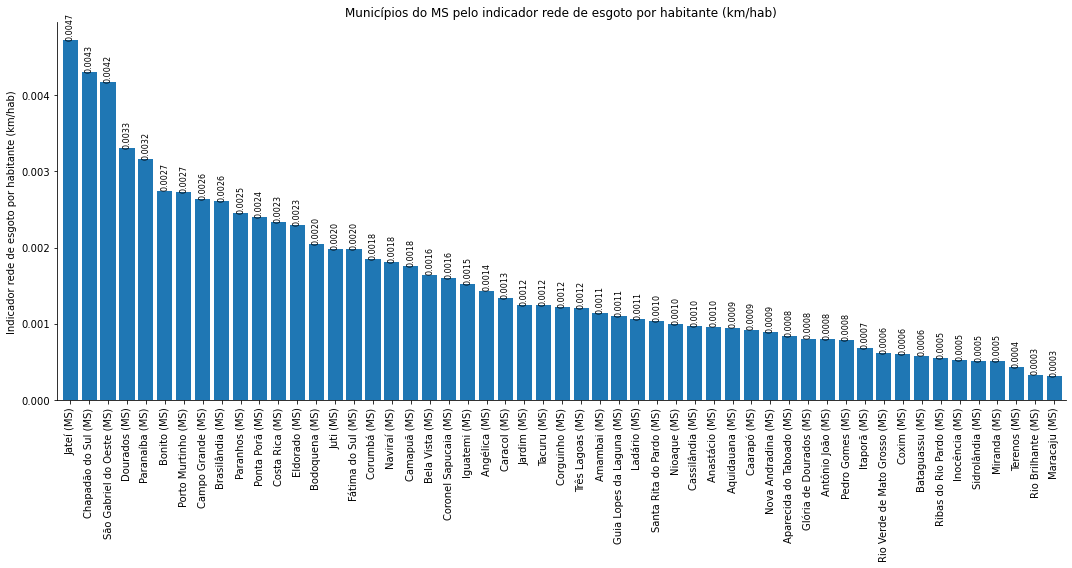

In [38]:
import matplotlib.pyplot as plt

# Filtrar apenas os municípios do Mato Grosso do Sul
df_ms = df_merged[df_merged['municipio'].str.endswith('(MS)')]


# Salvar o DataFrame resultante em um arquivo Excel
#df_ms.to_excel('indicadorAguaMS.xlsx', index=False)

# Filtrar os valores do DataFrame pelo indicador
df_filtered = df_ms[df_ms['esgoto/pop'] > 0].copy()

# Ordenar o DataFrame pelo indicador agua em ordem decrescente
df_filtered.sort_values('esgoto/pop', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(df_filtered['municipio'], df_filtered['esgoto/pop'])
plt.xticks(rotation=90)
#plt.xlabel('Municípios')
plt.ylabel('Indicador rede de esgoto por habitante (km/hab)')
plt.title('Municípios do MS pelo indicador rede de esgoto por habitante (km/hab)')
plt.tight_layout()

# Adicionar os valores das colunas acima de cada barra
for i, v in enumerate(df_filtered['esgoto/pop']):
    plt.text(i, v, "{:.4f}".format(v), ha='center', va='bottom', fontsize=8, rotation=90)
    
# Reduzir espaços entre a origem dos eixos e as barras
plt.xlim(-0.7, len(df_filtered['municipio']) - 0.4)

# Remover borda superior e borda lateral direita
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.savefig('indicadorEsgoto_MS.png')

plt.show()